In [6]:
#Task:K-means Clustering
 #   1.import libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [7]:
  #2. Load the data set

data=pd.read_csv("Iris.csv")

In [8]:
##3.Look at top 5 values

data.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [11]:
## 4. Select only the numerical features (sepal length, sepal width, petal length, petal width)
#4.select only annual income and spending score
X=data[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]

In [14]:
## Standardizing the data (optional but recommended)
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [12]:
#5.Import KMeans clustering
from sklearn.cluster import KMeans

In [13]:
#6.List to store within cluster sum of square
wcss=[]

In [18]:
##7.Fit the Kmeans algorithm with different values of K
for i in range(1,11):
    Kmeans=KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=42)
    Kmeans.fit(X_scaled)
    wcss.append(Kmeans.inertia_)


In [19]:
wcss

[600.0,
 223.73200573676345,
 140.96581663074699,
 114.6178858577668,
 91.2954447406698,
 81.75658187204952,
 71.31982095188795,
 62.65176715031905,
 55.26184119603464,
 50.62316902954044]

In [27]:
Kmeans = KMeans(n_clusters = 3, max_iter = 100,n_init=10).fit(X_scaled)

data['clusters'] = Kmeans.labels_
print('Clusters assigned to each datapoints :')
print(data['clusters'])

Clusters assigned to each datapoints :
0      1
1      1
2      1
3      1
4      1
      ..
145    2
146    0
147    2
148    2
149    0
Name: clusters, Length: 150, dtype: int32


In [21]:
print('\nSum of Square Error/ WCSS is :',Kmeans.inertia_)


Sum of Square Error/ WCSS is : 50.62316902954044


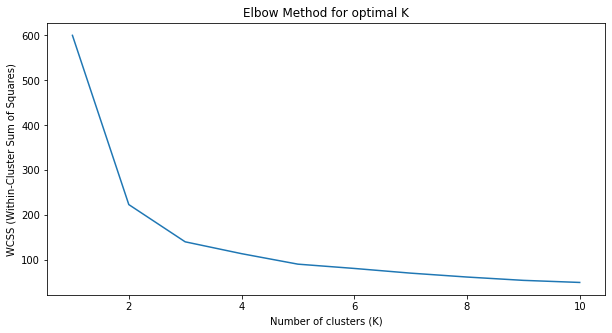

Optimal number of clusters (Elbow Method): 2


In [40]:
#8.Plot the WCss values
plt.figure(figsize=(10,5))
plt.plot(range(1,11),wcss)
plt.title("Elbow Method for optimal K")
plt.xlabel('Number of clusters (K)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.show()
optimal_k_elbow = np.argmax(np.diff(np.diff(wcss))) + 2  # +2 because we start counting from K=1
print(f"Optimal number of clusters (Elbow Method): {optimal_k_elbow}")

In [39]:
optimal_k_elbow = np.argmax(np.diff(np.diff(wcss))) + 2  # +2 because we start counting from K=1
print(f"Optimal number of clusters (Elbow Method): {optimal_k_elbow}")

Optimal number of clusters (Elbow Method): 2


In [31]:
#9.Fit the Kmeans clustering algo with K=5
kmeans=KMeans(n_clusters=3,init='k-means++',max_iter=300,n_init=10,random_state=42)

In [32]:
#10.Make predication

y_kmeans=kmeans.fit_predict(X_scaled)

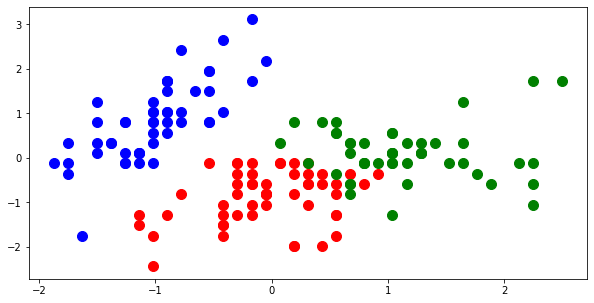

In [37]:
#11.visualizing the clusters
plt.figure(figsize=(10,5))
plt.scatter(X_scaled[y_kmeans==0][:,0],X_scaled[y_kmeans==0][:,1],s=100,c="red",label="cluster 1")
plt.scatter(X_scaled[y_kmeans==1][:,0],X_scaled[y_kmeans==1][:,1],s=100,c="blue",label='cluster 2')
plt.scatter(X_scaled[y_kmeans==2][:,0],X_scaled[y_kmeans==2][:,1],s=100,c="green",label="cluster 3")

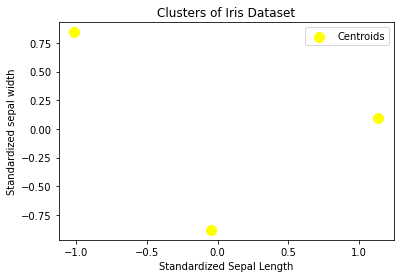

In [38]:
# Plotting the centroids
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c="yellow",label="Centroids")
plt.title("Clusters of Iris Dataset")
plt.xlabel('Standardized Sepal Length')
plt.ylabel('Standardized sepal width')
plt.legend()
plt.show()